# Основная информация проекта

## Цель проекта
Отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

## Описание датасета
1. **school** - аббревиатура школы, в которой учится ученик;
2. **sex** - пол ученика ('F' - женский, 'M' - мужской);
3. **age** - возраст ученика (от 15 до 22);
4. **address** - тип адреса ученика ('U' - городской, 'R' - за городом);
5. **famsize** - размер семьи('LE3' <= 3, 'GT3' >3);
6. **Pstatus** - статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно);
7. **Medu** - образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее);
8. **Fedu** - образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее);
9. **Mjob** - работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое);
10. **Fjob** - работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое);
11. **reason** — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое);
12. **guardian** - опекун ('mother' - мать, 'father' - отец, 'other' - другое);
13. **traveltime** - время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.);
14. **studytime** - время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов);
15. **failures** - количество внеучебных неудач (n, если 1<=n<=3, иначе 0);
16. **schoolsup** - дополнительная образовательная поддержка (yes или no);
17. **famsup** - семейная образовательная поддержка (yes или no);
18. **paid** - дополнительные платные занятия по математике (yes или no);
19. **activities** - дополнительные внеучебные занятия (yes или no);
20. **nursery** - посещал детский сад (yes или no);
21. **higher** - хочет получить высшее образование (yes или no);
22. **internet** - наличие интернета дома (yes или no);
23. **romantic** - в романтических отношениях (yes или no);
24. **famrel** - семейные отношения (от 1 - очень плохо до 5 - очень хорошо);
25. **freetime** - свободное время после школы (от 1 - очень мало до 5 - очень мого);
26. **goout** - проведение времени с друзьями (от 1 - очень мало до 5 - очень много);
27. **health** - текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо);
28. **absences** - количество пропущенных занятий;
29. **score** - баллы по госэкзамену по математике.


**Целевая переменная** - "score"

## Этапы выполнения проекта
 1. **[Импорт библиотек и загрузка данных](#Импорт-библиотек-и-загрузка-данных)**
 2. **[Написание функций для обработки и анализа данных](#Функции-для-обработки-и-анализа-данных)**
 3. **[Обзор данных](#Обзор-данных)**
 4. **[Предобработка данных](#Предобработка-данных)**

# Импорт библиотек и загрузка данных

In [106]:
import numpy as np
import pandas as pd
import pandas_profiling as pp
from itertools import combinations
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

In [107]:
# Установка максимального количества строк для отображения
pd.set_option('display.max_rows', 50)
# Установка максимального количества стоолбцов для отображения
pd.set_option('display.max_columns', 50)

In [371]:
stud_eda = pd.read_csv('stud_math.csv') # Загрузка датасета

# Функции для обработки и анализа данных

In [4]:
def parsing_all_columns_data(data):
    '''Функция для анализа всех столбцов на количество 
    уникальных значений и количество пропусков'''

    for col in data.columns:
        unique_values = len(data[col].value_counts())
        empty_values = data[col].isna().sum()
        print(
            f"В столбце '{col}' уникальных значений - {unique_values} ,а количество пропусков - {empty_values}.")

In [369]:
def cols_to_drop(data):
    '''Функция для определия столбцов, 
    не влияющих на целевую переменную'''

    # Поиск колонок с большим количеством пропусков
    many_null_cols = [
        col for col in data.columns if data[col].isnull().sum() / data.shape[0] > 0.9]
    # Поиск колонок в которых одно из значений встречается > 90%
    big_top_value_cols = [col for col in data.columns if data[col].value_counts(
        dropna=False, normalize=True).values[0] > 0.9]
    # Поиск колонок в которых только одно значение
    one_value_cols = [col for col in data.columns if data[col].nunique() <= 1]
    return list(set(many_null_cols + big_top_value_cols + one_value_cols))

In [320]:
def display_specification(column):
    '''Функция для посчёта уникальных значений, 
    количество пропусков в стобцак и их визуализация'''

    # Посчёт уникальных значений
    unique_values = len(stud_eda[column].value_counts())
    # Посчёт пустых значений
    empty_values = stud_eda[column].isna().sum()

    fig = plt.figure()
    axes = fig.add_axes([0, 0, 1, 1])
    axes.set_ylim(0, 60)
    axes.bar(x=str(column), height=unique_values,
             width=-0.4, align='edge', label='Уникальные значения')
    # Функция для создания подписи данных уникальных значени
    drow_label(axes.patches, axes)

    axes.bar(x=str(column), height=empty_values,
             width=0.4, align='edge', label='Количество пропусков')
    # Функция для создания подписи данных количества пропусков
    drow_label(axes.patches, axes)

    axes.legend(loc=1)

In [244]:
def drow_label(rects, ax):
    '''Функция для установки меток данных диаграммы
    '''

    # Получение высоты по оси Y для расчета позиции метки
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom

    for rect in rects:
        height = rect.get_height()
        # Установка позиции и выравнивание меток по оси X/Y
        ax.text(rect.get_x() + rect.get_width()/2., height +
                (y_height * 0.01), '%d' % int(height), ha='center', va='bottom')

In [281]:
def definition_duplicates(data):
    '''Функция для определия дубликатов в датасете
    '''

    duplicate_data = data.duplicated().sum()
    if duplicate_data > 0:
        print('В датасете присутствуют дубликаты')
    else:
        print('В датасете дубликаты отсутствуют')

In [368]:
def test(column, boundaries):
    if stud_eda.loc[:, column].dtypes != np.dtype('O'):
        if column not in boundaries.keys():
            IQR = stud_eda[column].quantile(
                0.75) - stud_eda[column].quantile(0.25)
            perc25 = stud_eda[column].quantile(0.25)
            perc75 = stud_eda[column].quantile(0.75)
            min_value = perc25 - 1.5*IQR
            max_value = perc75 + 1.5*IQR
            data_out = stud_eda.loc[(~stud_eda.loc[:, column].between(
                min_value, max_value)) & (pd.notnull(stud_eda.loc[:, column]))]

            print(f'Распределение IQR для столбца - {column}')
            print(f'Количество ошибок - {data_out.shape[0]}')
            print('25-й перцентиль: {},'.format(perc25),
                  '75-й перцентиль: {},'.format(perc75),
                  'IQR: {}, '.format(IQR),
                  'Границы выбросов: [{}, {}].'.format(min_value, max_value))

            stud_eda[column].loc[stud_eda[column].between(min_value, max_value)].hist(
                bins=10, range=(min_value, max_value), label='IQR')

            plt.legend()
            plt.show()
            
            display_data_out(data_out, column)
        else:
            IQR = stud_eda[column].quantile(
                0.75) - stud_eda[column].quantile(0.25)
            perc25 = stud_eda[column].quantile(0.25)
            perc75 = stud_eda[column].quantile(0.75)
            min_value = boundaries[column][0]
            max_value = boundaries[column][1]
            data_out = stud_eda.loc[(~stud_eda.loc[:, column].between(
                min_value, max_value)) & (pd.notnull(stud_eda.loc[:, column]))]

            print(f'Распределение IQR для столбца - {column}')
            print(f'Количество ошибок - {data_out.shape[0]}')
            print('25-й перцентиль: {},'.format(perc25),
                  '75-й перцентиль: {},'.format(perc75),
                  'IQR: {}, '.format(IQR),
                  'Границы выбросов: [{}, {}].'.format(min_value, max_value))

            stud_eda[column].loc[stud_eda[column].between(min_value, max_value)].hist(
                bins=10, range=(min_value, max_value), label='IQR')

            plt.legend()
            plt.show()
            
            display_data_out(data_out, column)

In [362]:
def display_data_out(data, column):
    if  0 < len(data) >= 5:
        print(f'Отображение первых 5 строк с ошибками в столбце {column}')
        display(data.head(5))
    elif len(data) == 1:
        print(f'Отображение строки с ошибкой в столбце {column}')
        display(data)

# Обзор данных

In [6]:
# Проверка на успешность загрузки данных и краткий вывод таблицы с информацией
display(stud_eda.head(10))
stud_eda.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [7]:
# Вывод количества строк и столбцов таблицы
print(f'Датасет состоит из {stud_eda.shape[0]} строк и {stud_eda.shape[1]} столбцов')

Датасет состоит из 395 строк и 30 столбцов


In [136]:
# Подсчёт уникальных значений и количество пропусков в столбцак датасета
parsing_all_columns_data(stud_eda)

В столбце 'school' уникальных значений - 2 ,а количество пропусков - 0.
В столбце 'sex' уникальных значений - 2 ,а количество пропусков - 0.
В столбце 'age' уникальных значений - 8 ,а количество пропусков - 0.
В столбце 'address' уникальных значений - 2 ,а количество пропусков - 17.
В столбце 'famsize' уникальных значений - 2 ,а количество пропусков - 27.
В столбце 'Pstatus' уникальных значений - 2 ,а количество пропусков - 45.
В столбце 'Medu' уникальных значений - 5 ,а количество пропусков - 3.
В столбце 'Fedu' уникальных значений - 6 ,а количество пропусков - 24.
В столбце 'Mjob' уникальных значений - 5 ,а количество пропусков - 19.
В столбце 'Fjob' уникальных значений - 5 ,а количество пропусков - 36.
В столбце 'reason' уникальных значений - 4 ,а количество пропусков - 17.
В столбце 'guardian' уникальных значений - 3 ,а количество пропусков - 31.
В столбце 'traveltime' уникальных значений - 4 ,а количество пропусков - 28.
В столбце 'studytime' уникальных значений - 4 ,а количество 

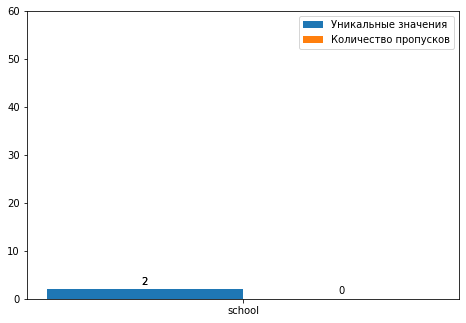

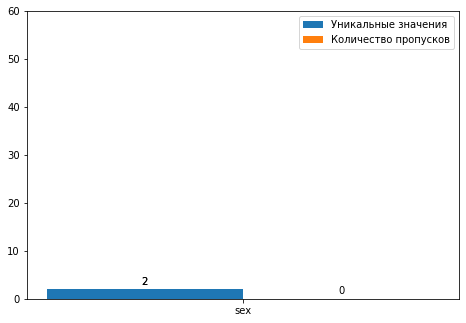

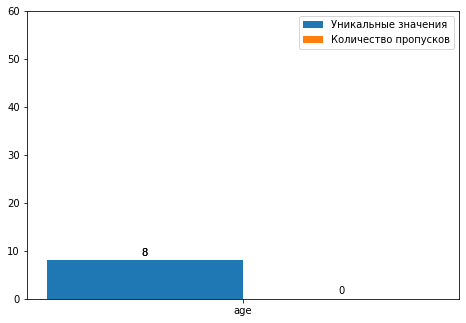

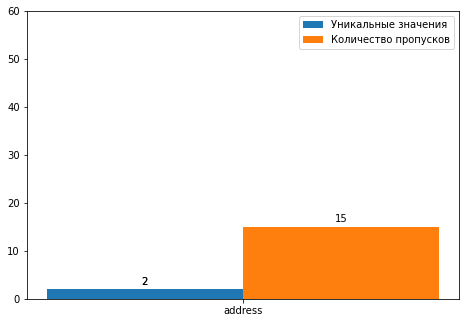

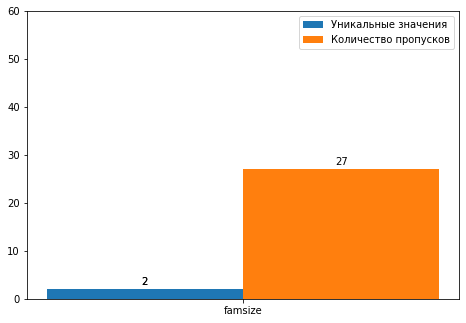

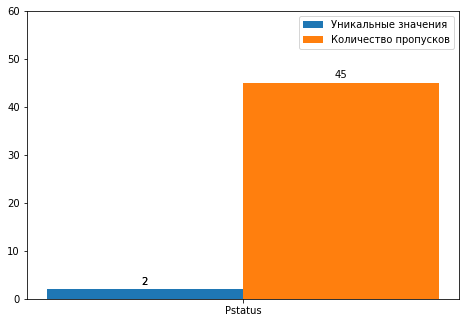

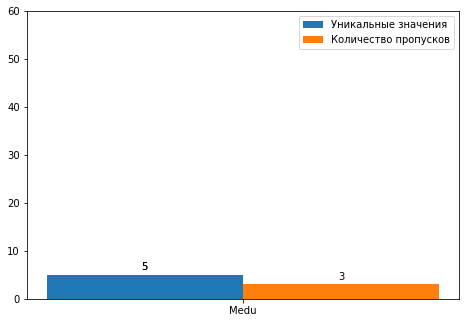

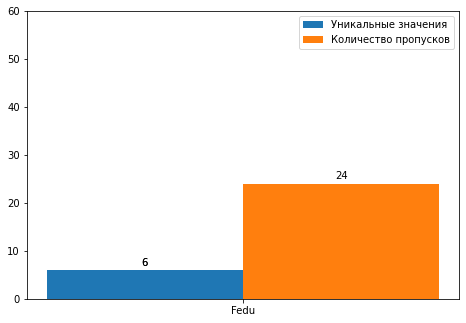

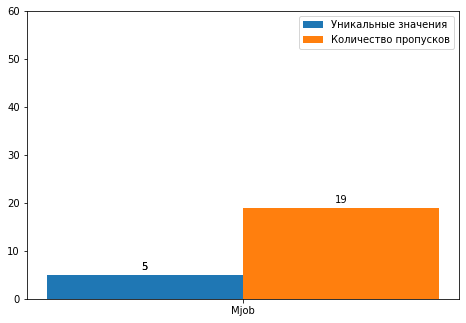

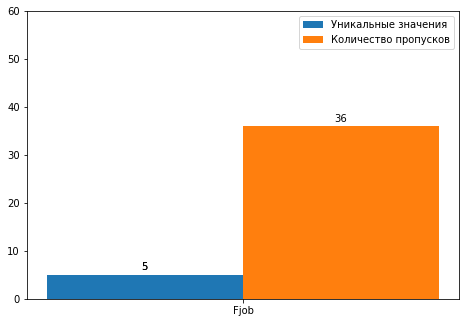

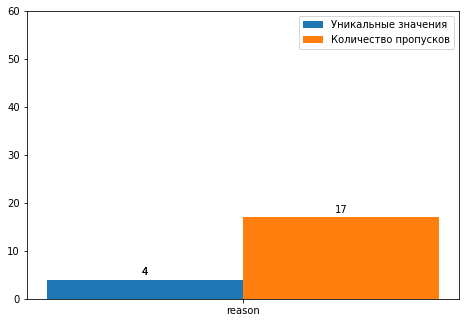

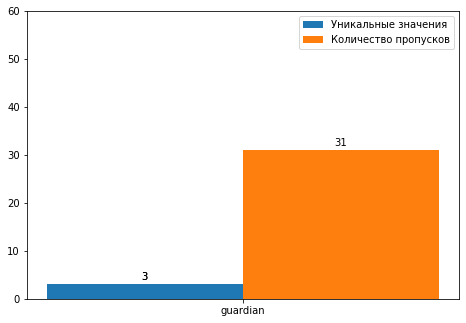

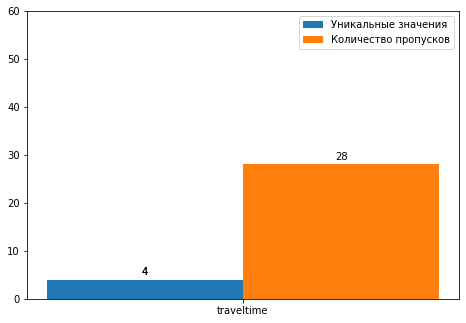

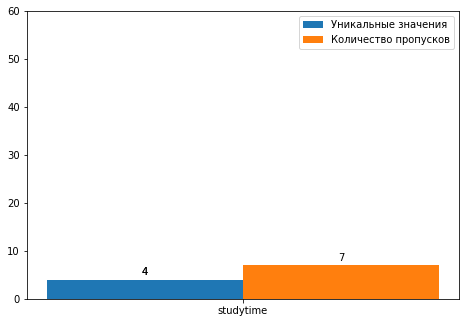

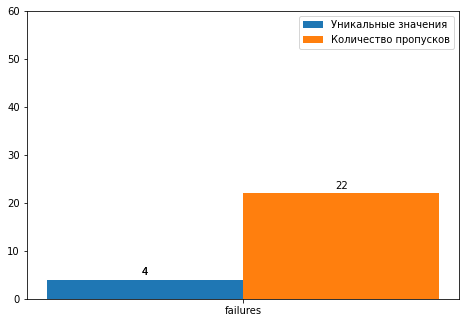

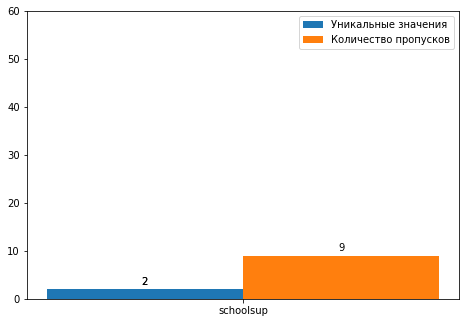

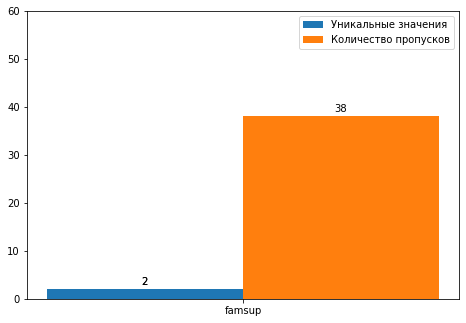

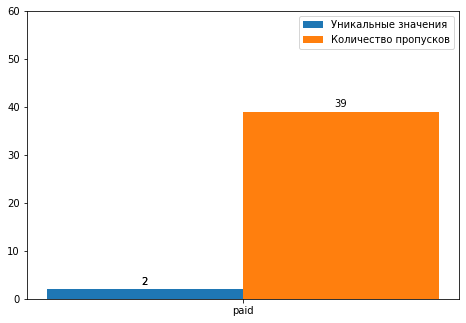

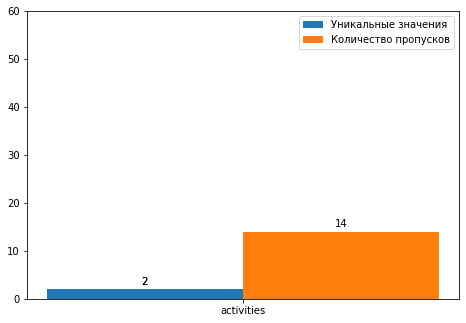

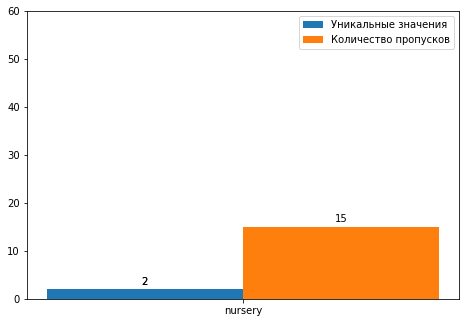

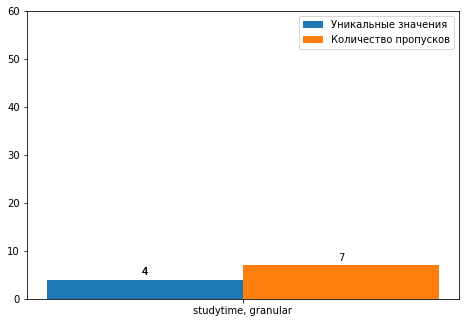

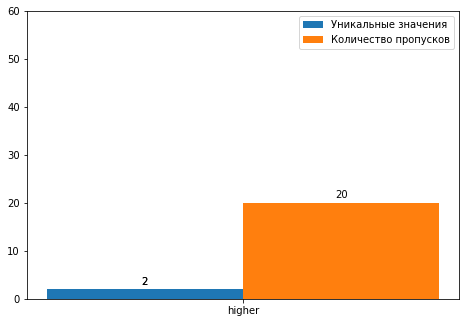

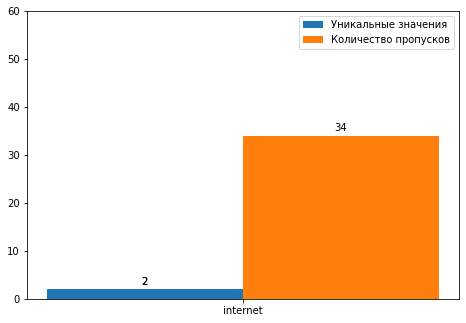

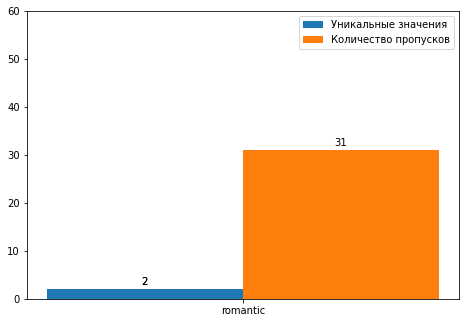

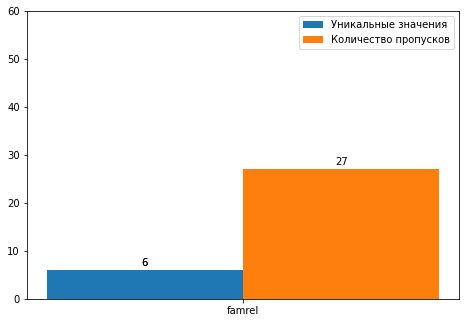

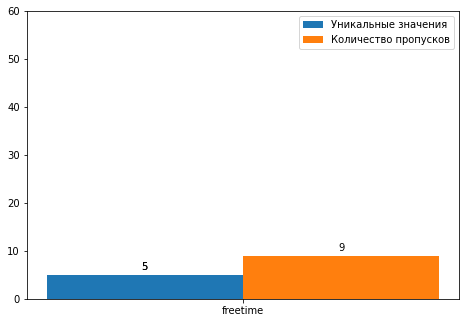

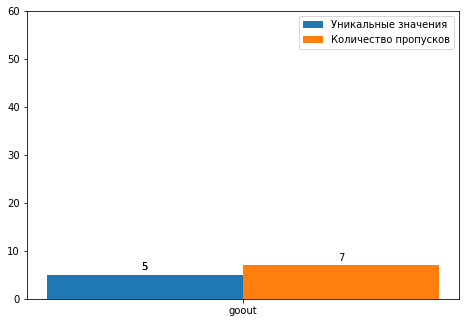

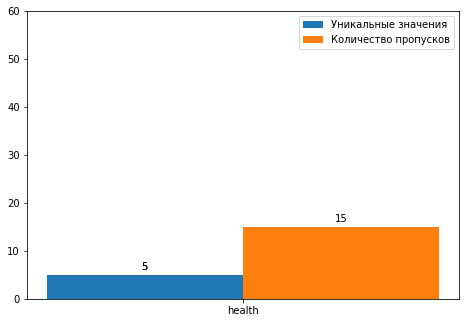

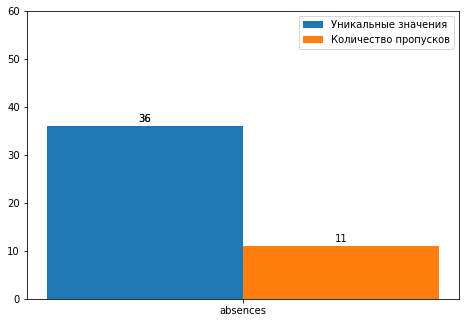

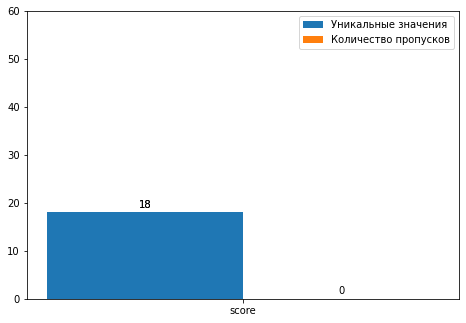

In [321]:
for column in stud_eda.columns:
    display_specification(column)

In [248]:
# Подсчёт количества столбцов с пропущенными значениями
print(
    f'Количество столбцов с пропущенными значениями - {stud_eda.isnull().any().sum()}')

Количество столбцов с пропущенными значениями - 26


In [282]:
# Проверка датасета на наличие дубликатов
definition_duplicates(stud_eda)

В датасете дубликаты отсутствуют


In [366]:
data_boundaries = {'age': [15, 22],
                   'Medu': [0, 4],
                   'Fedu': [0, 4],
                   'traveltime': [1, 4],
                   'studytime': [1, 4],
                   'famrel': [1, 5],
                   'freetime': [1, 5],
                   'goout': [1, 5],
                   'health': [1, 5],
                   'failures': [0, 3],
                   'score': [0, 100]}

Распределение для столбца - age
Количество ошибок - 0
25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [15, 22].


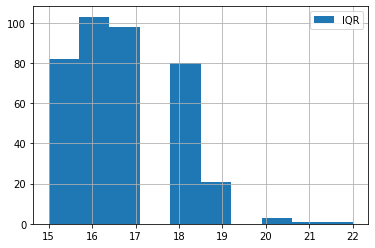

Распределение для столбца - Medu
Количество ошибок - 0
25-й перцентиль: 2.0, 75-й перцентиль: 4.0, IQR: 2.0,  Границы выбросов: [0, 4].


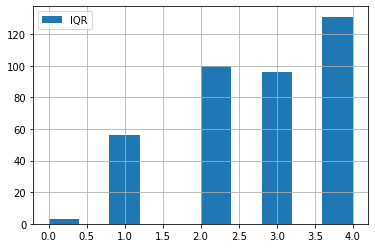

Распределение для столбца - Fedu
Количество ошибок - 1
25-й перцентиль: 2.0, 75-й перцентиль: 3.0, IQR: 1.0,  Границы выбросов: [0, 4].


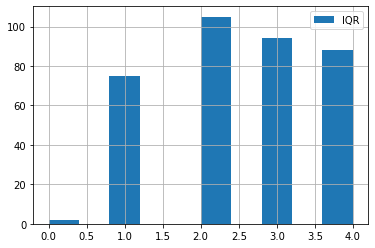

Отображение строки с ошибкой в столбце Fedu


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
11,GP,F,15,U,GT3,NaN,2.0,40.0,services,other,reputation,father,3.0,3.0,0.0,no,yes,no,yes,yes,-9.0,yes,yes,no,5.0,2.0,2.0,4.0,4.0,60.0


Распределение для столбца - traveltime
Количество ошибок - 0
25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0,  Границы выбросов: [1, 4].


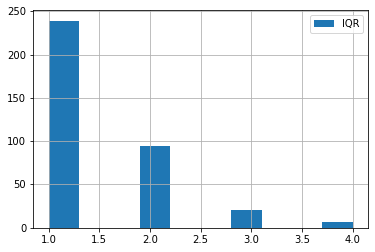

Распределение для столбца - studytime
Количество ошибок - 0
25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0,  Границы выбросов: [1, 4].


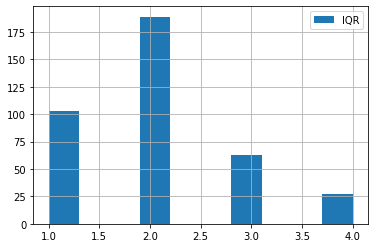

Распределение для столбца - failures
Количество ошибок - 0
25-й перцентиль: 0.0, 75-й перцентиль: 0.0, IQR: 0.0,  Границы выбросов: [0, 3].


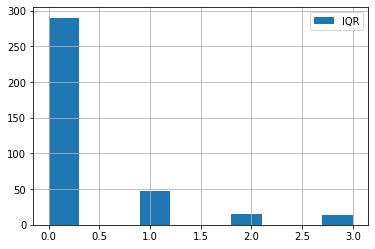

Распределение для столбца - studytime, granular
Количество ошибок - 27
25-й перцентиль: -6.0, 75-й перцентиль: -3.0, IQR: 3.0,  Границы выбросов: [-10.5, 1.5].


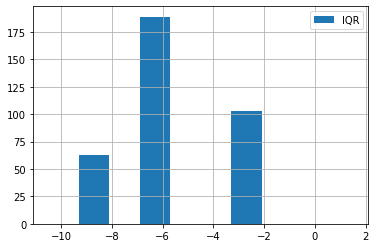

Отображение первых 5 строк с ошибками в столбце studytime, granular


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
47,GP,M,16,U,GT3,T,4.0,3.0,health,NaN,reputation,mother,1.0,4.0,0.0,no,no,no,yes,yes,-12.0,yes,yes,no,4.0,2.0,2.0,2.0,4.0,100.0
66,GP,M,15,U,GT3,A,4.0,4.0,other,services,reputation,mother,1.0,4.0,0.0,no,yes,no,yes,no,-12.0,yes,yes,yes,1.0,3.0,3.0,3.0,4.0,60.0
67,GP,F,16,U,GT3,NaN,3.0,NaN,services,other,course,mother,1.0,4.0,0.0,yes,yes,yes,no,yes,-12.0,yes,yes,NaN,4.0,3.0,3.0,5.0,4.0,30.0
69,GP,F,15,R,LE3,T,3.0,1.0,other,other,reputation,father,2.0,4.0,0.0,no,yes,no,no,no,-12.0,yes,yes,no,4.0,4.0,2.0,3.0,12.0,80.0
70,GP,M,16,U,GT3,T,3.0,1.0,other,other,reputation,father,NaN,4.0,0.0,no,yes,yes,no,yes,-12.0,yes,yes,no,4.0,3.0,2.0,5.0,0.0,75.0


Распределение для столбца - famrel
Количество ошибок - 1
25-й перцентиль: 4.0, 75-й перцентиль: 5.0, IQR: 1.0,  Границы выбросов: [1, 5].


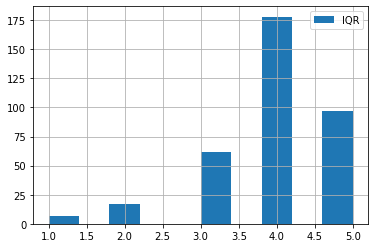

Отображение строки с ошибкой в столбце famrel


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
25,GP,F,16,U,GT3,NaN,2.0,2.0,services,services,home,mother,1.0,1.0,2.0,no,yes,yes,no,no,-3.0,yes,yes,no,-1.0,2.0,2.0,5.0,14.0,40.0


Распределение для столбца - freetime
Количество ошибок - 0
25-й перцентиль: 3.0, 75-й перцентиль: 4.0, IQR: 1.0,  Границы выбросов: [1, 5].


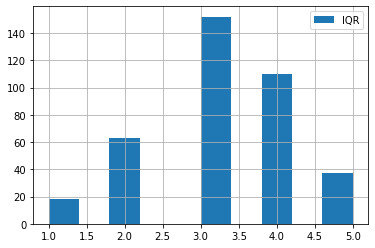

Распределение для столбца - goout
Количество ошибок - 0
25-й перцентиль: 2.0, 75-й перцентиль: 4.0, IQR: 2.0,  Границы выбросов: [1, 5].


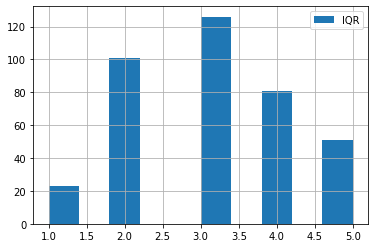

Распределение для столбца - health
Количество ошибок - 0
25-й перцентиль: 3.0, 75-й перцентиль: 5.0, IQR: 2.0,  Границы выбросов: [1, 5].


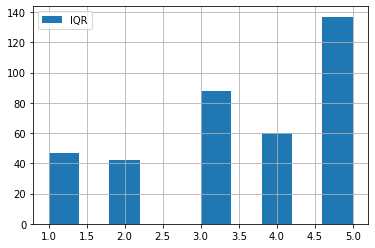

Распределение для столбца - absences
Количество ошибок - 17
25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


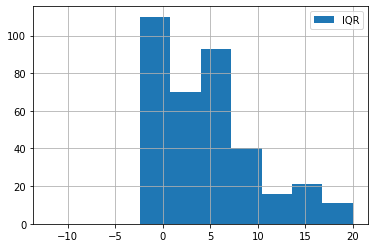

Отображение первых 5 строк с ошибками в столбце absences


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
40,GP,F,16,U,LE3,T,2.0,2.0,other,other,home,mother,2.0,2.0,1.0,no,NaN,no,yes,no,-6.0,yes,yes,yes,3.0,3.0,3.0,3.0,25.0,55.0
74,GP,F,16,U,GT3,T,3.0,3.0,other,services,home,mother,1.0,2.0,0.0,yes,yes,yes,yes,yes,-6.0,yes,yes,no,4.0,NaN,3.0,5.0,54.0,55.0
103,GP,F,15,U,GT3,T,3.0,2.0,services,other,home,mother,2.0,2.0,0.0,yes,yes,yes,no,yes,-6.0,yes,yes,no,4.0,3.0,5.0,2.0,26.0,30.0
183,GP,F,17,U,LE3,NaN,3.0,3.0,other,other,reputation,mother,1.0,2.0,0.0,no,yes,no,yes,yes,-6.0,yes,yes,yes,5.0,3.0,3.0,1.0,56.0,40.0
198,GP,F,17,U,GT3,NaN,4.0,4.0,services,teacher,home,mother,2.0,1.0,1.0,no,yes,no,no,yes,-3.0,yes,NaN,no,4.0,2.0,4.0,2.0,24.0,90.0


Распределение для столбца - score
Количество ошибок - 0
25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 30.0,  Границы выбросов: [0, 100].


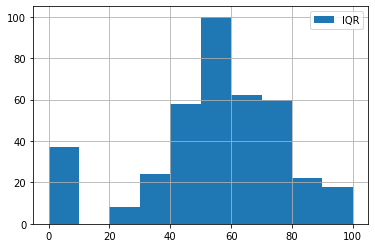

In [367]:
for column in stud_eda.columns:
    test(column,data_boundaries)

In [374]:
# Вывод столбцов, не влияющих на целевую переменную
print(cols_to_drop(stud_eda))

['higher']


### Результат обзора данных
Представленный датасет состоит из 30 столбцов, 17 из которых имеют строковый тип, а 13 числовой, и содержит 395 строк с информацией. В столбцах датасета, кроме (school, sex, age) имеются пропуски в значениях.

В ходе обзора данных в столбце целевой переменной 'score' было выявлено 6 строк с пустыми значениями. Так как целевая переменная не может содержать пустые, приблизительные и вероятностные значения, необходимо удалить выявленные строки.



# Предобработка данных

In [273]:
# Удаление строк с пустым значением в столбце 'score'
stud_eda = stud_eda.dropna(subset=['score'])